# Pre-Processing Techniques

## Imports

In [105]:
# CONSTANT Variables
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']

fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['AB42', 'AB40']

display1 = ['PLASMA_NFL', 'PLASMATAU', 'AB4240'] # These should be the biomarker values
display2 = ['ABETA', 'PTAU', 'TAU'] # This should be the Non-Blood values, such as MMSE etc.
display3 = ['MMSE', 'AGE', 'PTEDUCAT']

output_file_path = "File1/"

# Pre-Split Training and Testing (Ensure Dist. of classes)

In [106]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [107]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [108]:
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'AGE', 'PTEDUCAT', 'PTAU', 'TAU', 'PTGENDER', 'ABETA'])
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingFiles\PreProcessingPy.py:56: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,CN,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,Male,NaN
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,81.3,18,22.83,239.7,Male,741.5
2,4,bl,MCI,31.2,3.76,0.311458,27.0,67.5,10,13.29,153.1,Male,1501
3,5,bl,CN,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,Male,547.3
4,6,bl,MCI,52.5,2.86,0.153287,25.0,80.4,13,NaN,NaN,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,69.3,20,64.37,575,Male,392.5
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,65.9,15,NaN,NaN,Male,NaN
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,74.3,18,18.62,213.7,Male,1308
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,77.9,17,22.48,234.9,Male,390.5


## Rename Fields

In [109]:
# Rename to be more intuitive for rest of detection, Also remove non-numeric characters
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,SCD,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,Male,NaN
1,3,bl,AD,188.3,3.84,0.220661,20.0,81.3,18,22.83,239.7,Male,741.5
2,4,bl,MCI,31.2,3.76,0.311458,27.0,67.5,10,13.29,153.1,Male,1501
3,5,bl,SCD,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,Male,547.3
4,6,bl,MCI,52.5,2.86,0.153287,25.0,80.4,13,NaN,NaN,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1402,bl,AD,94.1,4.45,0.260446,23.0,69.3,20,64.37,575,Male,392.5
520,1409,bl,AD,46.4,3.54,0.231390,21.0,65.9,15,NaN,NaN,Male,NaN
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,74.3,18,18.62,213.7,Male,1308
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,77.9,17,22.48,234.9,Male,390.5


## Plot the data

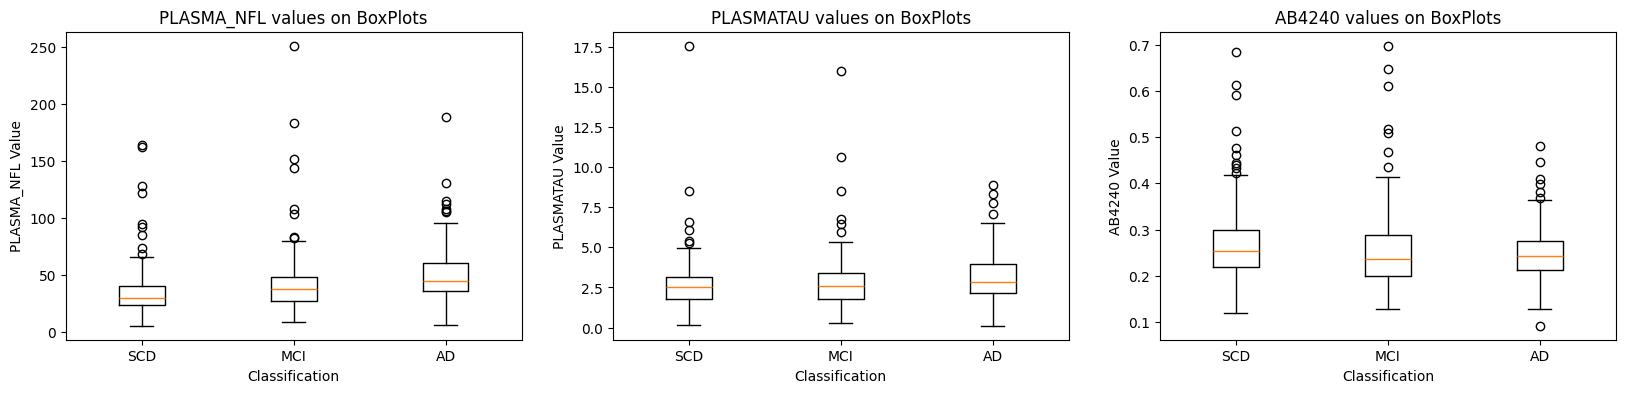

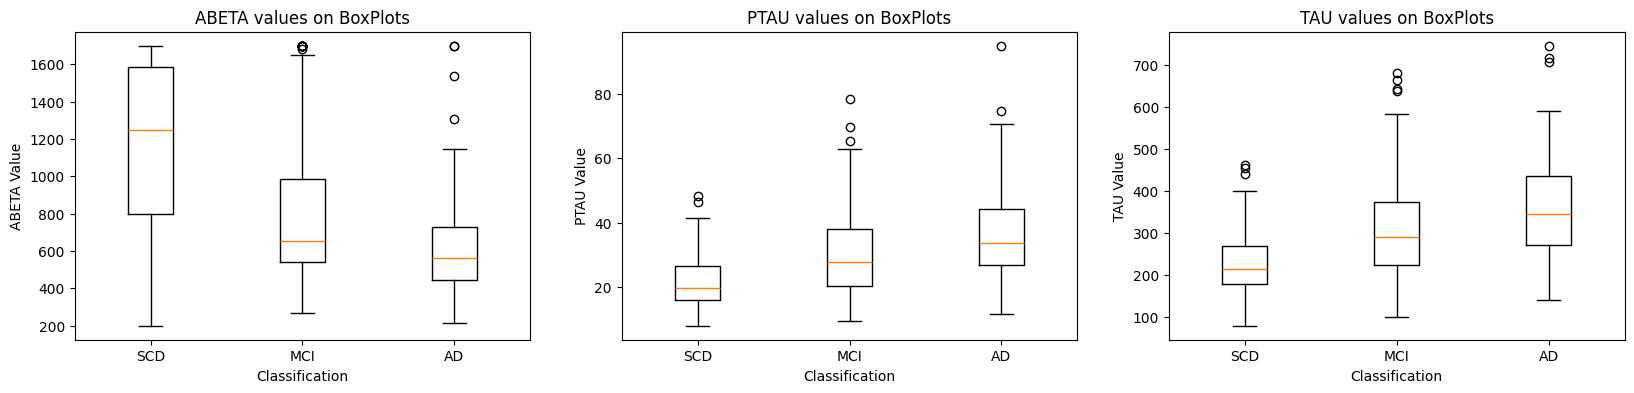

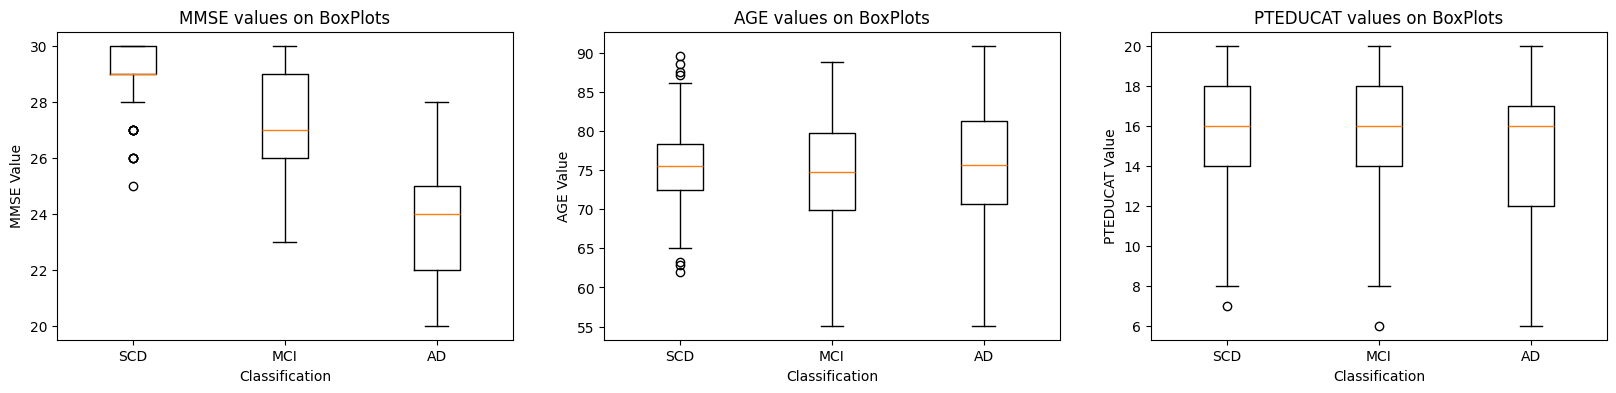

In [110]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)
vd.display(display2)
vd.display(display3)

In [111]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [112]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)
preprocessor.remove_outliers(display2)
preprocessor.remove_outliers(display3)

preprocessor.df

[6, 9, 398, 21, 282, 284, 286, 32, 163, 42, 180, 53, 181, 56, 184, 198, 77, 210, 101, 363, 365, 368, 118, 253]
[393, 140, 109, 439]
[97, 354, 229, 40, 233, 43, 14, 214, 278, 312, 60, 285, 222, 191]


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,AGE,PTEDUCAT,PTAU,TAU,PTGENDER,ABETA
0,2,bl,SCD,28.2,2.41,0.331165,28.0,74.3,16,NaN,NaN,Male,NaN
3,5,bl,SCD,36.3,3.81,0.189760,29.0,73.7,16,33.43,337,Male,547.3
8,14,bl,SCD,39.3,4.51,0.205351,29.0,78.5,12,16.68,203.6,Female,1582
10,16,bl,SCD,23.6,4.57,0.398098,28.0,65.4,9,15.88,170.5,Male,550.6
11,19,bl,SCD,25.0,2.57,0.410816,29.0,73.1,18,18.05,213.7,Female,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1377,bl,AD,88.7,5.75,0.203793,23.0,82.6,16,NaN,NaN,Male,NaN
513,1382,bl,AD,35.0,3.68,0.304738,21.0,64.3,16,NaN,NaN,Male,NaN
514,1385,bl,AD,45.1,0.12,0.181040,26.0,69.5,12,NaN,NaN,Female,NaN
519,1402,bl,AD,94.1,4.45,0.260446,23.0,69.3,20,64.37,575,Male,392.5


### Display the Filtered Data

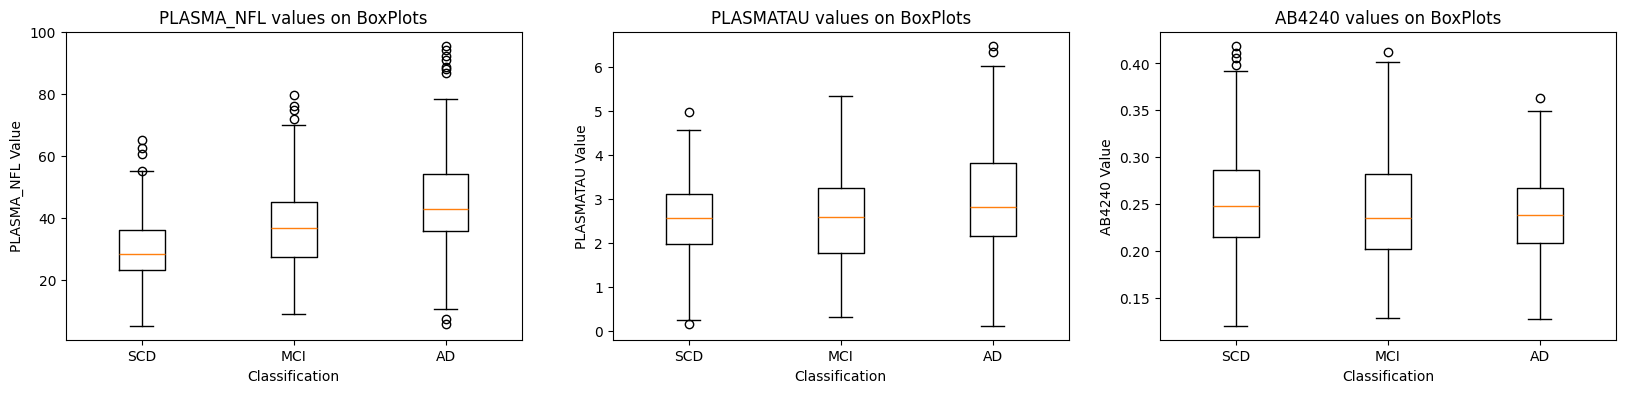

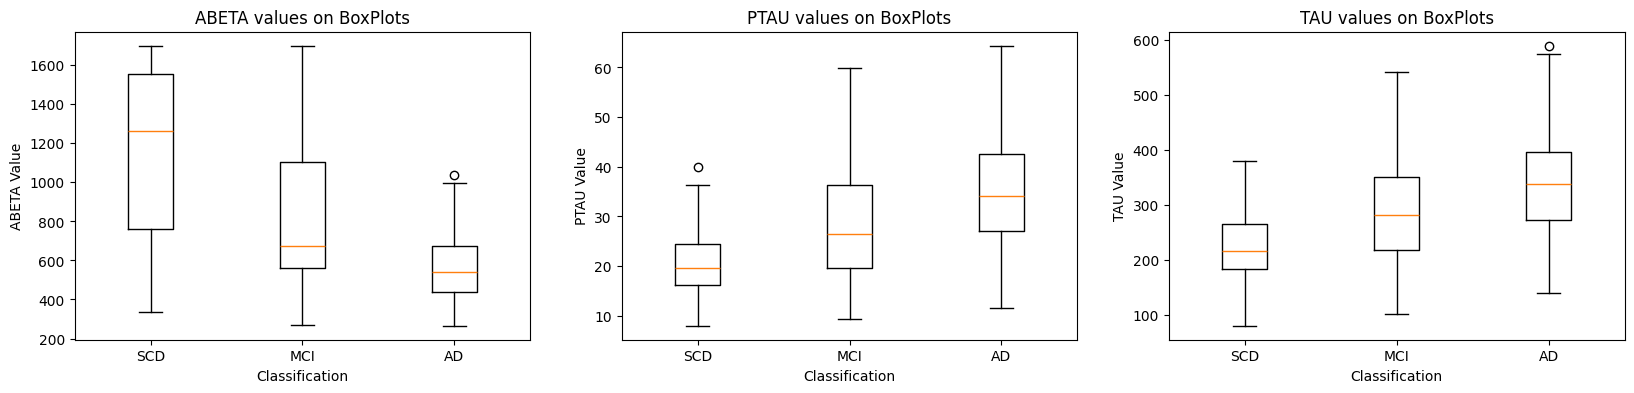

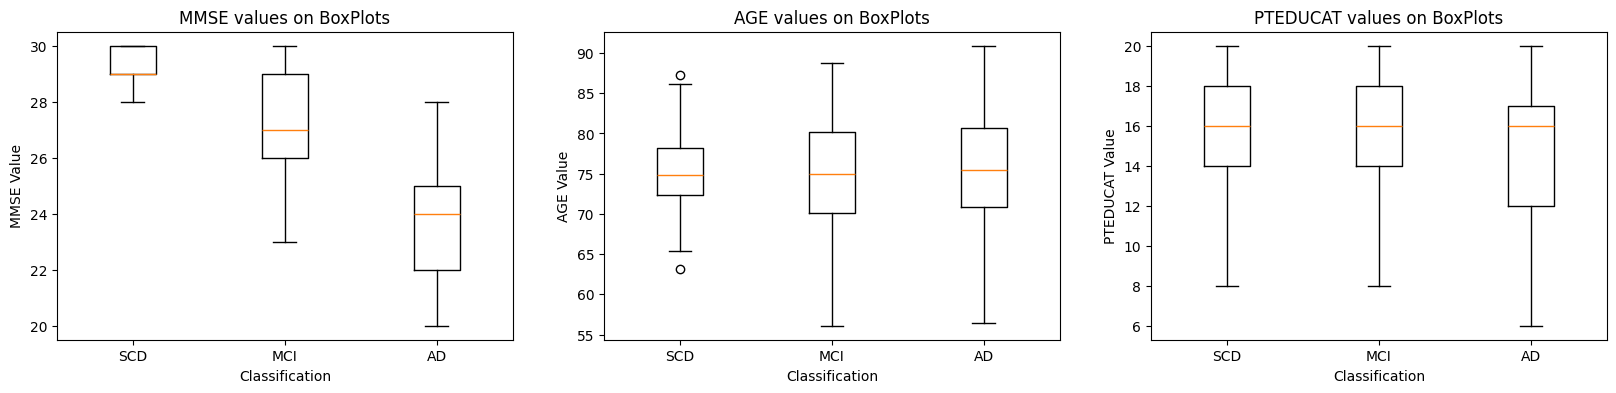

In [113]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)
vd.display(display3)

In [114]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

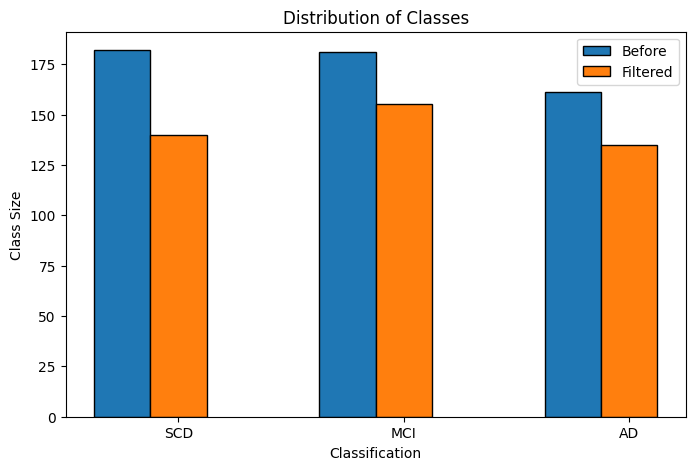

In [115]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File1")
display.display_results()